In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.drop(['to_city_id' ,'package_id' ,'from_city_id' ,'to_date'],axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_date              43431 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(6), int64(7), object(2)
memory usage: 5.0+ MB


In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

In [7]:
data.reset_index(inplace=True,drop=True)

In [8]:
data.head()

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


## Tripe Distance

In [9]:
import geopy.distance

dist = []
for i in range(0,len(data)):
    coords_1 = (data['from_lat'][i], data['from_long'][i])
    coords_2 = (data['to_lat'][i], data['to_long'][i])
    dist.append(geopy.distance.vincenty(coords_1, coords_2).km)


In [10]:
data['Trip dist'] = dist

In [11]:
data[['from_lat','from_long','to_lat','to_long','Trip dist']].head()

,from_lat,from_long,to_lat,to_long,Trip dist
0,12.924150,77.672290,12.927320,77.635750,3.980687
1,12.966910,77.749350,12.927680,77.626640,14.004432
2,12.937222,77.626915,13.047926,77.597766,12.648909
3,12.989990,77.553320,12.971430,77.639140,9.534596
4,12.845653,77.677925,12.954340,77.600720,14.655467


In [12]:
print(data.from_lat.mean(),data.from_long.mean())

12.985572853555983 77.63576806933757


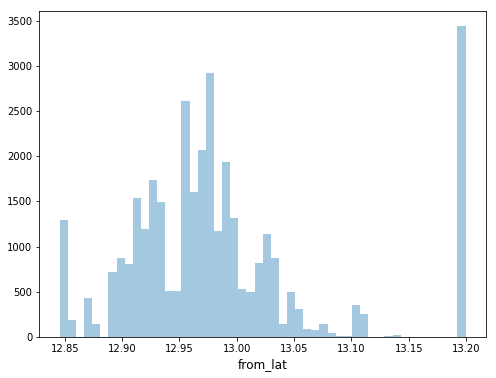

In [13]:
llimit = np.percentile(data.from_lat.values, 1)
ulimit = np.percentile(data.from_lat.values, 99)
data['from_lat'].ix[data['from_lat']<llimit] = llimit
data['from_lat'].ix[data['from_lat']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(data.from_lat.values, bins=50, kde=False)
plt.xlabel('from_lat', fontsize=12)
plt.show()


#### So the latitude values are primarily between 12.85 and 13.2 . Now let us look at the longitude values.

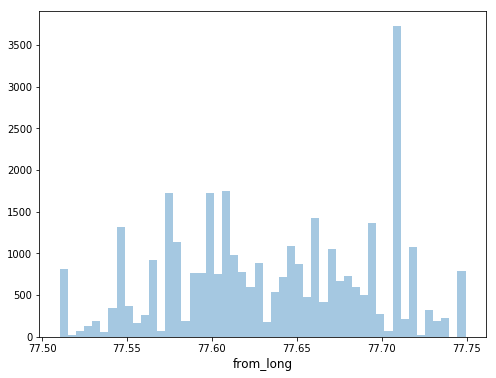

In [14]:
llimit = np.percentile(data.from_long.values, 1)
ulimit = np.percentile(data.from_long.values, 99)
data['from_long'].ix[data['from_long']<llimit] = llimit
data['from_long'].ix[data['from_long']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(data.from_long.values, bins=50, kde=False)
plt.xlabel('from_long', fontsize=12)
plt.show()


#### The longitude values range between 77.50 and 77.75 . So the data corresponds to the Bengaluru Kadiranapalya, Karnataka, 560038.

In [15]:
import folium
from folium import plugins
from folium.plugins import HeatMap


map_hooray = folium.Map(location=[12.985746396144814 ,77.63602522584172],
                    zoom_start = 12) 

# Ensure you're handing it floats
data['from_lat'] = data['from_lat'].astype(float)
data['from_long'] = data['from_long'].astype(float)


heat_df = data[['from_lat', 'from_long']]

# List comprehension to make out list of lists
heat_data = [[row['from_lat'],row['from_long']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

In [16]:
def generateBaseMap(default_location=[12.985746396144814 ,77.63602522584172], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

from folium.plugins import HeatMap
data['count'] = 1
base_map = generateBaseMap()
HeatMap(data=data[['from_lat', 'from_long', 'count']].groupby(['from_lat', 'from_long']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map


In [17]:
data["from_date"] = pd.to_datetime(data["from_date"])

data['month'] = data.from_date.apply(lambda x: x.month)
data['week'] = data.from_date.apply(lambda x: x.week)
data['day'] = data.from_date.apply(lambda x: x.day)
data['hour'] = data.from_date.apply(lambda x: x.hour)

In [18]:
df_hour_list = []
for hour in data.hour.sort_values().unique():
    df_hour_list.append(data.loc[data.hour == hour, ['from_lat', 'from_long', 'count']].groupby(['from_lat', 'from_long']).sum().reset_index().values.tolist())


In [19]:
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

# Press play button to visualize hourly pattern.
### Looking at the hourly data pattern, it can be seen that central of bengaluru will always have a high amount of rides coming from it throughout the day. 
#### Also, looking at the result above, it can be seen that throughout the day, there will always be a ride that comes from the central of bengaluru area, thus we would probably set a lot of stops throughout the central of bengaluru area as we scale the project to more stops throughout the city

# Location Clustering / Pop-up Marker  

In [47]:
from datetime import datetime
import os
import folium
from folium.plugins import MarkerCluster

BENG_COORDINATES = (12.985746396144814 ,77.63602522584172)

MAX_RECORDS = 1500
map_nyctaxi = folium.Map(location=BENG_COORDINATES, zoom_start=9)
marker_cluster = MarkerCluster().add_to(map_nyctaxi)
for each in data[0:MAX_RECORDS].iterrows():
    folium.Marker(
        location = [each[1]['from_lat'],each[1]['from_long']], popup={'AREA' : data['from_area_id'][each[0]],
                                         'BOOKING TIME' :  data['booking_created'][each[0]],
                                         'VEHICLE ID': data['vehicle_model_id'][each[0]],
                                         'TRAVEL TYPE' : data['travel_type_id'][each[0]]}).add_to(marker_cluster)
map_nyctaxi

###  Looking at the result above, it can be seen that throughout the day most demanded areas of taxi's are :
#### 1. Kempegowda International Airport
#### 2. Kempegowda KSRTC Bus Station
#### 3. Electronic City Phase